In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('dataset 3.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
df['school'].unique()
df['sex'].unique()
df['address'].unique()
df['famsize'].unique()
df['Pstatus'].unique()
df['Mjob'].unique()
df['Fjob'].unique()
df['reason'].unique()
df['guardian'].unique()
df['schoolsup'].unique()
df['famsup'].unique()
df['paid'].unique()
df['activities'].unique()
df['nursery'].unique()
df['higher'].unique()
df['internet'].unique()
df['romantic'].unique()


array(['no', 'yes'], dtype=object)

In [ ]:
df['school']=df['school'].replace({'GP':1, 'MS':2})
df['sex']=df['sex'].replace({'F':1, 'M':2})
df['address']=df['address'].replace({'U':1, 'R':2})
df['famsize']=df['famsize'].replace({'LE3':1, 'GT3':2})
df['Pstatus']=df['Pstatus'].replace({'T':1, 'A':2})
df['Mjob']=df['Mjob'].replace({'teacher':1, 'health':2, 'services':3, 'at_home':4, 'other':5})
df['Fjob']=df['Fjob'].replace({'teacher':1, 'health':2, 'services':3, 'at_home':4, 'other':5})
df['reason']=df['reason'].replace({'home':1, 'reputation':2, 'course':3, 'other':4})
df['guardian']=df['guardian'].replace({'mother':1, 'father':2, 'other':3})
df['schoolsup']=df['schoolsup'].replace({'yes':1, 'no': 2})
df['famsup']=df['famsup'].replace({'yes':1, 'no': 2})
df['paid']=df['paid'].replace({'yes':1, 'no': 2})
df['activities']=df['activities'].replace({'yes':1, 'no': 2})
df['nursery']=df['nursery'].replace({'yes':1, 'no': 2})
df['higher']=df['higher'].replace({'yes':1, 'no': 2})
df['internet']=df['internet'].replace({'yes':1, 'no': 2})
df['romantic']=df['romantic'].replace({'yes':1, 'no': 2})


<Axes: >

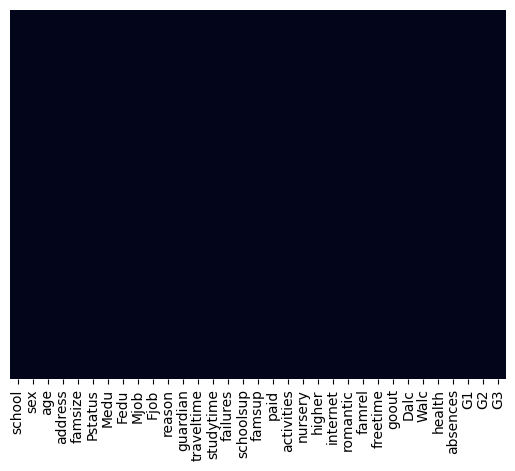

In [ ]:
df.isnull().sum()
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [ ]:
X = df.iloc[:,0:4]
X

,school,sex,age,address
0,1,1,18,1
1,1,1,17,1
2,1,1,15,1
3,1,1,15,1
4,1,1,16,1
...,...,...,...,...
390,2,2,20,1
391,2,2,17,1
392,2,2,21,2
393,2,2,18,2


In [ ]:
y = df['school']
y

,school
0,1
1,1
2,1
3,1
4,1
...,...
390,2
391,2
392,2
393,2


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7,p=2,metric='euclidean').fit(X_train_scaled,y_train)
knn.predict(X_train_scaled)
knn.score(X_train_scaled,y_train)

1.0

In [ ]:
knn.predict(X_test_scaled)
knn.score(X_test_scaled,y_test)

1.0

In [ ]:
pred = knn.predict(X_test_scaled)
matrix = classification_report(y_test,pred)
print(matrix)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00         8

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)

Text(0.5, 14.722222222222216, 'Actual value')

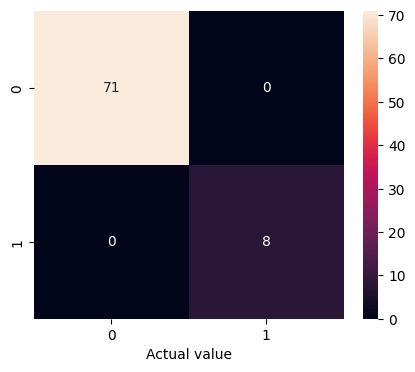

In [ ]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize=(5,4))
sn.heatmap(cm, annot=True, fmt="")
plt.xlabel('Predicted value')
plt.xlabel('Actual value')